#Predicting Overall Rating based on Players Different Stats and Comparing them with their Actual Overall rating


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##Data PreProcessing

In [2]:
df = pd.read_csv('/content/CMF(1).csv')
df

,Unnamed: 0,ID,Position,Player Name,Team Name,Nationality,Height,Weight,Age,Offensive Awareness,...,Tackling,Aggression,Defensive Engagement,GK Awareness,GK Catching,GK Parrying,GK Reflexes,GK Reach,Overall Rating,Price
0,0,250,CMF,Y. Endo,Jubilo Iwata,Japan,178,75,42,68,...,65,60,67,40,40,40,40,40,80,3.7
1,1,4073,CMF,Andrés Iniesta,Free Agents,Spain,171,68,38,68,...,67,59,65,40,40,40,40,40,83,0.0
2,2,4882,CMF,J. Milner,Brighton WB,England,175,70,36,67,...,68,84,77,40,40,40,40,40,87,22.0
3,3,9138,CMF,João Moutinho,Free Agents,Portugal,170,61,36,68,...,74,71,73,40,40,40,40,40,88,0.0
4,4,11073,CMF,Y. Takahagi,Tochigi SC,Japan,183,71,36,68,...,68,63,66,40,40,40,40,40,80,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,923,52785148104128,CMF,G. Wijnaldum,Paris Saint-Germain,Netherlands,175,69,32,76,...,78,78,83,40,40,40,40,40,93,0.0
924,924,52785416566753,CMF,Luis Alberto,SS Lazio,Spain,183,74,30,80,...,61,67,62,40,40,40,40,40,94,0.0
925,925,52785416618202,CMF,E. Eze,Crystal Palace RB,England,173,67,24,82,...,66,66,69,40,40,40,40,40,93,0.0
926,926,52785953500633,CMF,Lee Kang-In,Paris Saint-Germain,Republic of Korea,173,68,21,79,...,64,78,70,40,40,40,40,40,92,0.0


As we can see few columns are just **Arbitrary Values** which does not have any effect on Player stats.


1.   Unnamed: 0
2.   Player Name
3.   Team Name
4.   Nationality
5.   ID
6.   Position
7.   Price

So Dropping thes columns will not affect data set.





In [3]:

df = df.drop(['Unnamed: 0','Player Name', 'Team Name','Nationality','ID','Position','Price'], axis = 1)


In [9]:
df

,Height,Offensive Awareness,Ball Control,Dribbling,Tight Possession,Low Pass,Lofted Pass,Finishing,Heading,Set Piece Taking,...,Defensive Awareness,Tackling,Aggression,Defensive Engagement,GK Awareness,GK Catching,GK Parrying,GK Reflexes,GK Reach,Overall Rating
0,178,68,81,74,74,87,82,60,57,72,...,66,65,60,67,40,40,40,40,40,80
1,171,68,84,79,85,91,88,66,50,70,...,68,67,59,65,40,40,40,40,40,83
2,175,67,78,75,81,84,87,58,58,67,...,69,68,84,77,40,40,40,40,40,87
3,170,68,85,76,83,89,88,65,58,76,...,71,74,71,73,40,40,40,40,40,88
4,183,68,77,72,72,83,77,60,59,65,...,68,68,63,66,40,40,40,40,40,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,175,76,84,86,88,83,81,76,84,76,...,68,78,78,83,40,40,40,40,40,93
924,183,80,90,93,87,93,93,77,62,80,...,61,61,67,62,40,40,40,40,40,94
925,173,82,87,93,90,84,78,81,56,81,...,61,66,66,69,40,40,40,40,40,93
926,173,79,87,87,85,84,83,78,68,85,...,61,64,78,70,40,40,40,40,40,92


# EXPLORATORY DATA ANALYSIS

<Axes: >

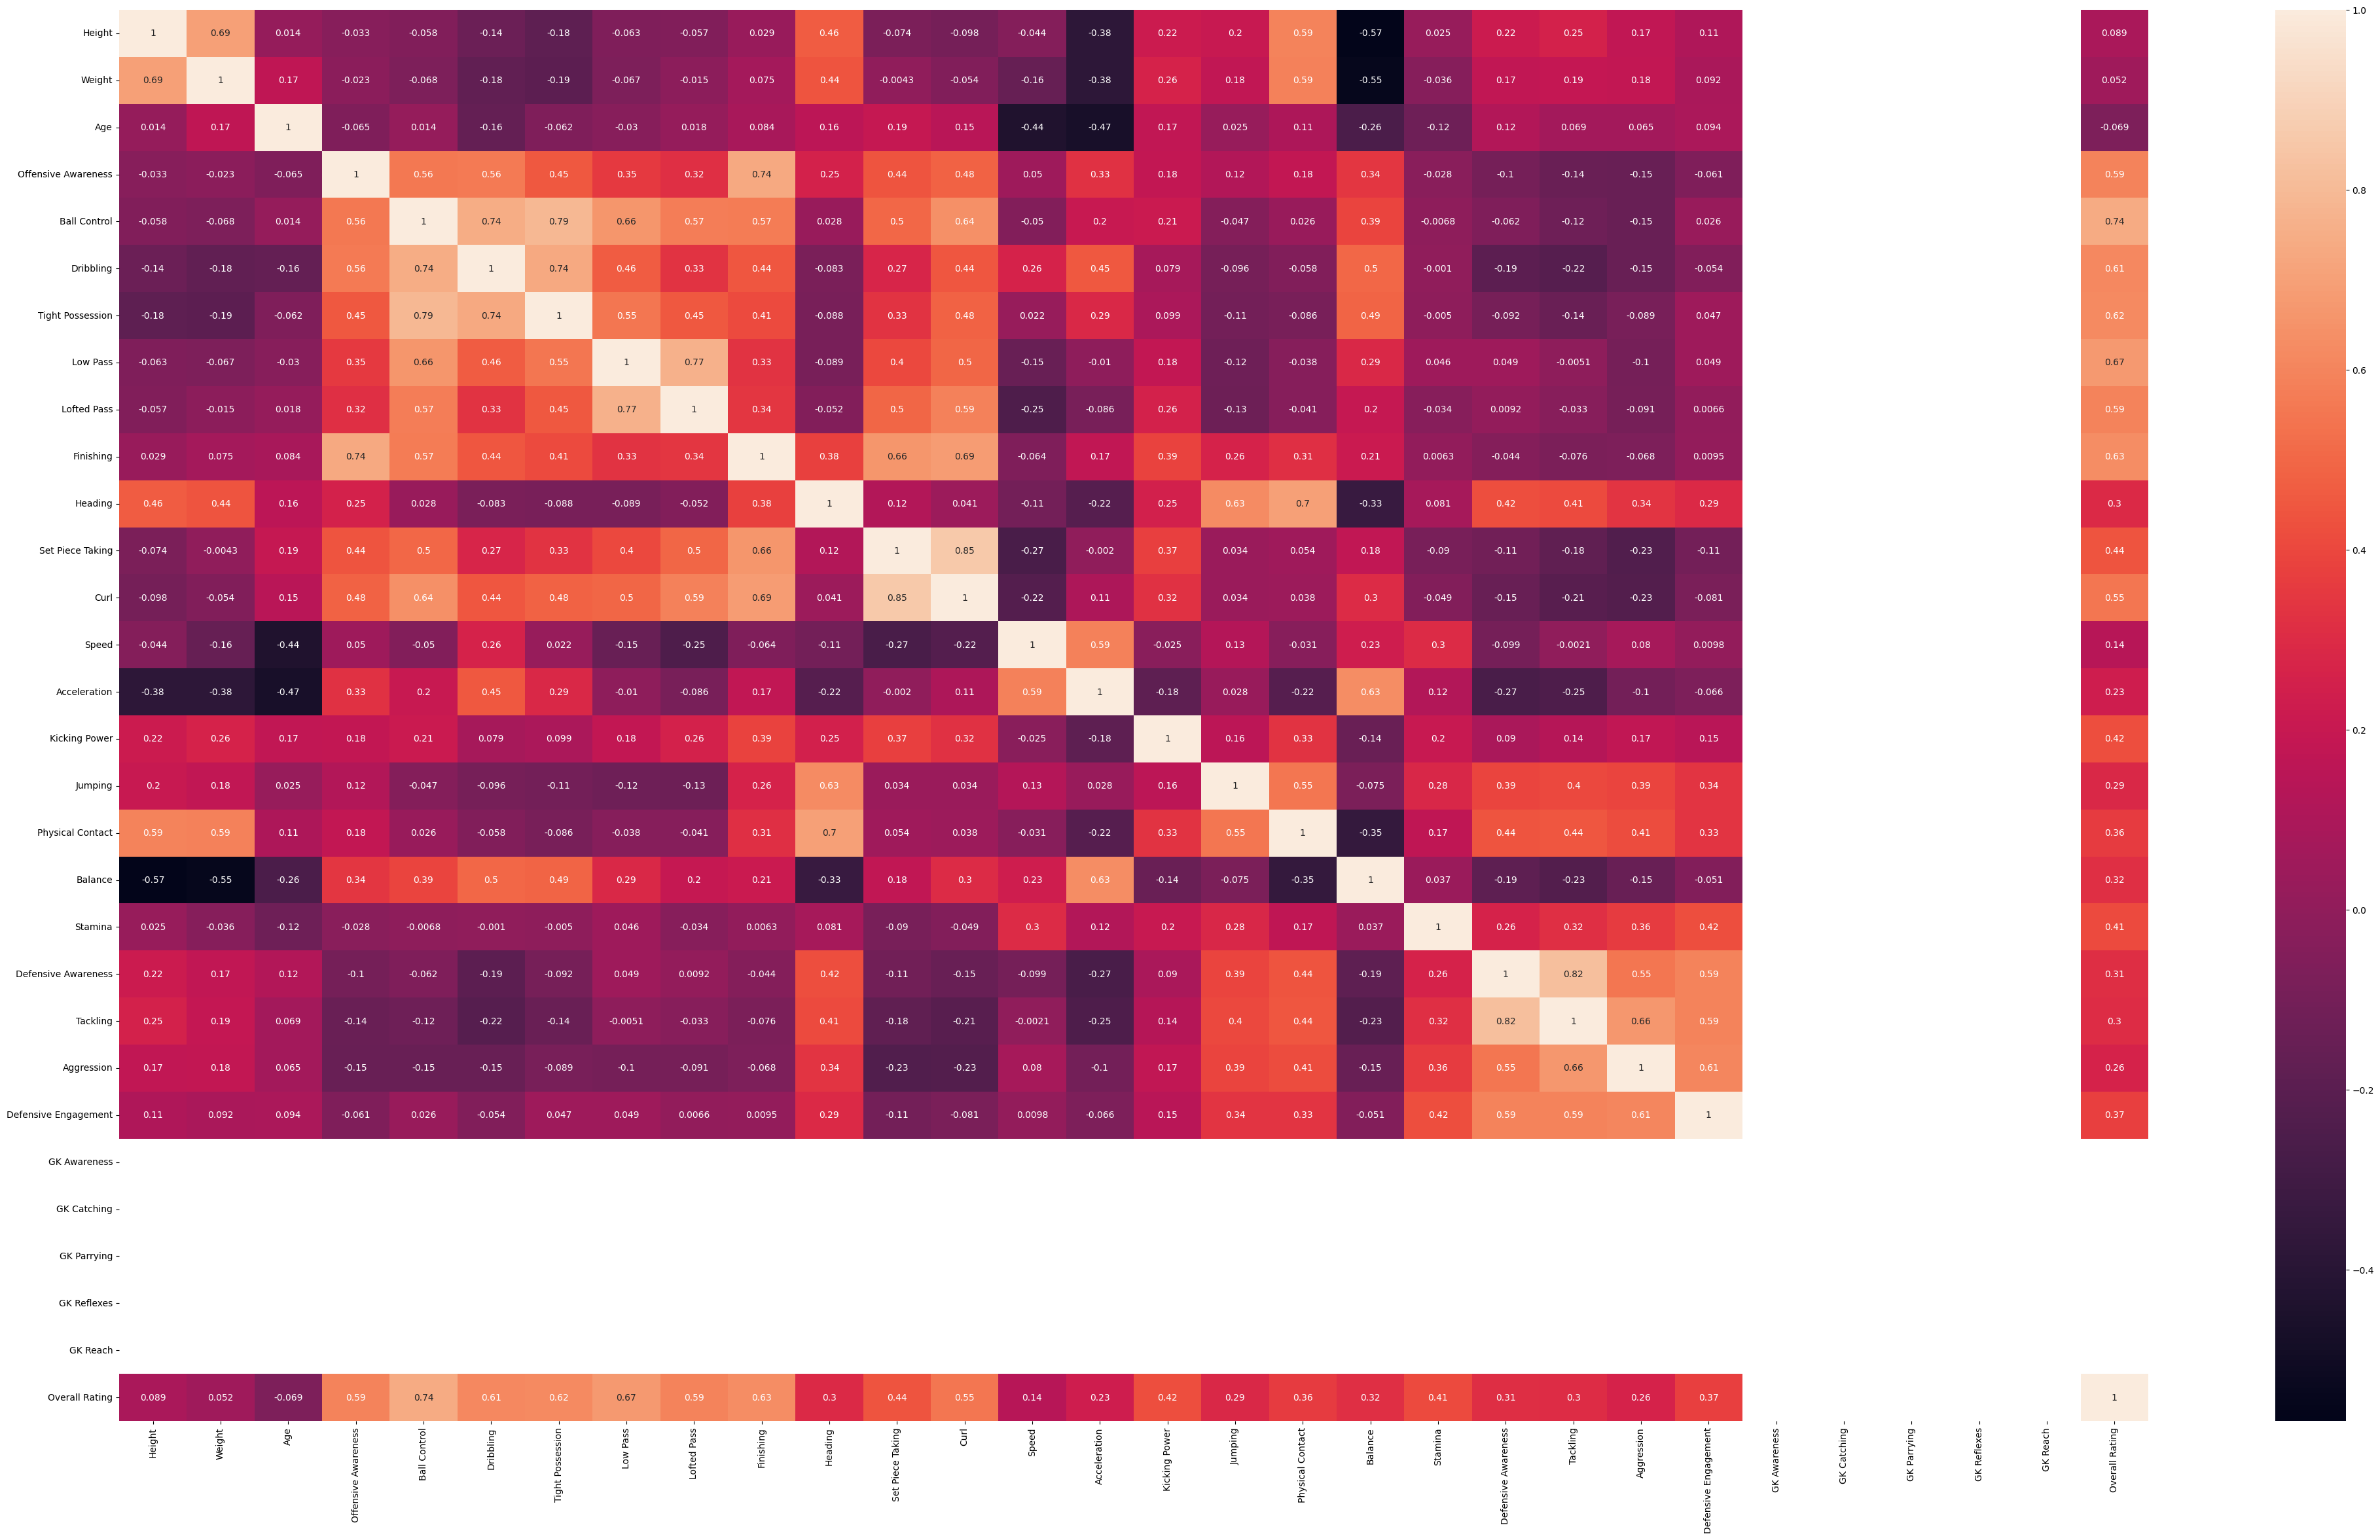

In [5]:
plt.figure(figsize=(50,28))
sns.heatmap(df.corr(), annot = True)

As we can see in the heatmap above overall rating is not correlated significantly with age, weight
and

In [6]:
df = df.drop(['Age','Weight'],axis = 1)

<Axes: xlabel='Lofted Pass', ylabel='Overall Rating'>

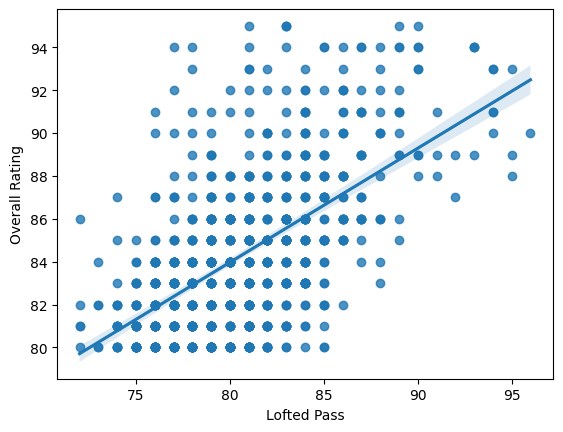

In [7]:
sns.regplot(data = df, x = 'Lofted Pass', y = 'Overall Rating')

<Axes: xlabel='Low Pass', ylabel='Overall Rating'>

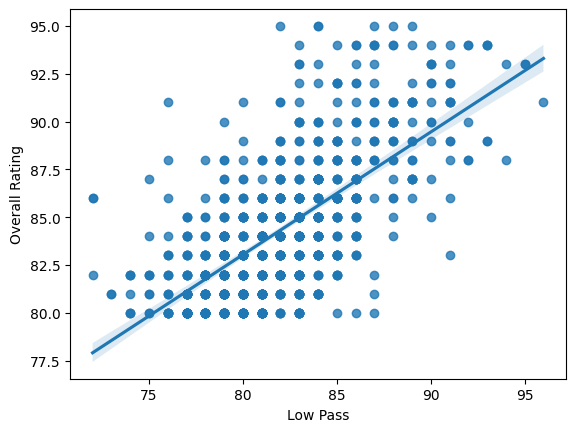

In [8]:
sns.regplot(data = df, x = 'Low Pass', y = 'Overall Rating')

 lofted pass, low pass  looks key stats for a CMF.

##Scaling And Train Test Split

In [10]:
X = df.drop('Overall Rating', axis =1) # Removing the feature we need to predict
y =df['Overall Rating']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
X_train= scaler.fit_transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

In [21]:
X_train.shape

(742, 27)

In [18]:
X_test.shape

(186, 27)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [20]:
model = Sequential()

model.add(Dense(27,activation='relu'))
model.add(Dense(27,activation='relu'))
model.add(Dense(27,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [22]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=4,epochs=200)

Epoch 1/200
186/186 [==============================] - 2s 3ms/step - loss: 3086.1350 - val_loss: 61.7836
Epoch 2/200
186/186 [==============================] - 0s 2ms/step - loss: 58.0421 - val_loss: 54.4096
Epoch 3/200
186/186 [==============================] - 0s 3ms/step - loss: 53.2313 - val_loss: 45.8061
Epoch 4/200
186/186 [==============================] - 0s 2ms/step - loss: 46.0164 - val_loss: 41.1497
Epoch 5/200
186/186 [==============================] - 1s 3ms/step - loss: 40.5514 - val_loss: 34.6571
Epoch 6/200
186/186 [==============================] - 0s 2ms/step - loss: 35.1405 - val_loss: 30.0023
Epoch 7/200
186/186 [==============================] - 0s 2ms/step - loss: 30.5033 - val_loss: 26.2773
Epoch 8/200
186/186 [==============================] - 1s 4ms/step - loss: 25.4997 - val_loss: 23.4304
Epoch 9/200
186/186 [==============================] - 1s 4ms/step - loss: 22.0480 - val_loss: 17.8495
Epoch 10/200
186/186 [==============================] - 1s 4ms/step - l

In [23]:
model.save('CMF_stats_predictor.h5')

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error
X_test
predictions = model.predict(X_test)
mean_absolute_error(y_test,predictions)